# Black Friday Data Set Analysis

By: Anika Rawat

In this data set, there is data about how consumers spend their money referring to three different product categories. Mostly there is information about the consumer profile and their personal statuses. I was curious to see whether men or women spend more money on the huge holiday sale of Black Friday where everything is sold for cheaper prices and shoppers go insane. I was also interested in whether people who are married have different spending habits.

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot_chart
bf = pd.read_csv("BlackFriday.csv")

In [72]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


First, I had to check if there are any missing values or null values. 

In [73]:
bf.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [74]:
bf.Product_Category_2.fillna(0, inplace=True)
bf.Product_Category_3.fillna(0, inplace=True)
bf.fillna(value=0,inplace=True)

Looking at the column names: 

In [75]:
bf.columns 

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [76]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Seeing correlations in order to graph interesting trends: 

In [77]:
bf.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.005389,0.021104,0.000129,-0.314125,0.038395,0.284120,1.000000


I wanted to visualize how many males vs females attended the sale. 
I would predict that more women would attend just frorm personal experience and the variety of prorducts targeted
towards women is much more than the ones for men. 

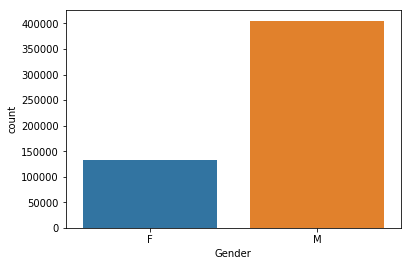

In [78]:
sns.countplot(bf['Gender'])

Interestingly, far fewer females paid for products at the sale! 
This could be because in married couples, the husband has paid but we cannot be certain of this!

Let us now analyze gender and age roles:

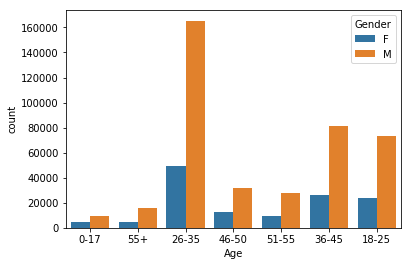

In [79]:
sns.countplot(bf['Age'],hue=bf['Gender'])

Interesting how the main buyer is men in their thirties. This could be because they must buy lots of products on sale
forr the whole family! Let's investigate the marital status aspect to see if this may be true that they perhaps are 
not just spending for themselves and have a partner or perhaps a family.

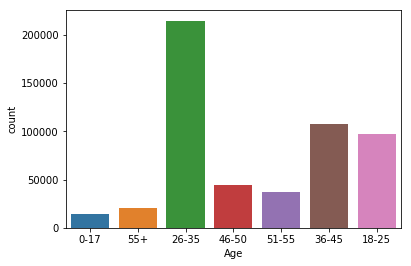

In [80]:
sns.countplot(bf['Age'])

The main age range spiles after mid twenties age range.
I think this is interesting because I thought there would have been considerably more peoeple in the 18-25 range
since college students are always looking to splurge on a sale. Maybe this particular sample of people for a store was 
mainly selling towards a certain older age range. 

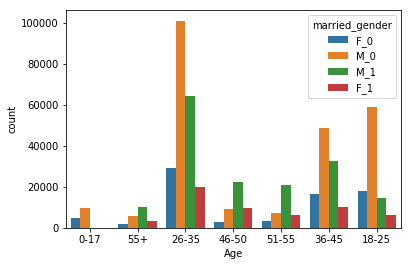

In [81]:
bf['married_gender'] = bf.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
sns.countplot(bf['Age'],hue=bf['married_gender'])

There aren't married couples in the 0-17 range which is not concerning because people don't tend to get married till later in life.
Above the age of 45, female buyers drop off interestingly. 
However, married male shoppers in that age range are paying relatvely more than the married females there so it could 
be that husbands cover the purchase more than the wives. 

I wanted to see if people bought out of a certain product category more than another on this black friday sale. 
This could help company marketing and strategy.

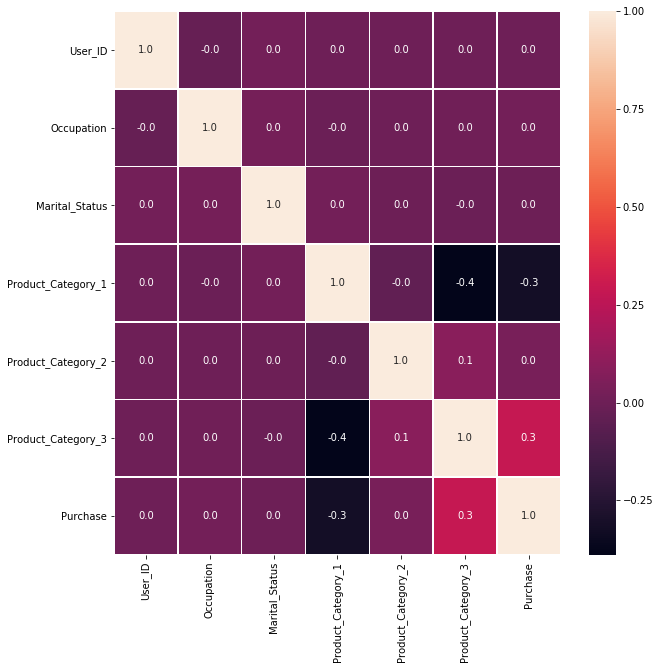

In [82]:
f,ax = plot_chart.subplots(figsize=(10, 10))
sns.heatmap(bf.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plot_chart.show()

Interestingly, by observing this heatmap, there is a negative correlation between Product_Category_1 and Product_Category_2.
It would be cooler if we knew what kinds of products these were but this information was not included in the data set.
This indicates that buyers of Product_Category_1 usually do not buy Product_Category_2 .
Also, it seems that the count of people buying category 1 products is verry small. So, category 2 products could have 
been much more popular! 